In [ ]:
### Project 2 SQLAlchemy Database Yeast_Gene expression 

In [6]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import pandas as pd
import sqlite3

#Importing the database and establishing a connection
yeast_engine = create_engine('sqlite:////blue/bsc4452/admontalvo/yeast.sqlite')
conn=yeast_engine.connect()

#creating a dataframe with pandas combining
#gene_id,location_id,function_id, and bioprocess_id to create a unique gene ID
#Odd primary key 
#Join statement linking all the tables together
df_yeast=pd.read_sql_query('''SELECT Expression.transcripts, Genes.name, Description.meaning,Molecular.function,Treatment.condition,locations.location,Bioprocess.process
                  FROM Expression JOIN Genes JOIN Description JOIN Molecular JOIN Treatment JOIN locations JOIN Bioprocess
                ON Expression.gene_id=Genes.id AND Expression.meaning_id=Description.id AND Expression.treatment_id=Treatment.id
                AND Expression.function_id=Molecular.id AND Expression.location_id=locations.id AND Expression.bioprocess_id=Bioprocess.id''', conn)


df_yeast.head(10) #Prints the first 10 rows

,transcripts,name,meaning,function,condition,location,process
0,7.379174,YGR131W,E1B1 ethanol,molecular_function,IFFABF,membrane,protein ion
1,5.858715,YGR131W,pbs2 galactose,molecular_function,SAASCC,membrane,protein ion
2,12.130323,YGR131W,G2A1 glucose,molecular_function,IFFAFF,membrane,protein ion
3,12.679748,YGR131W,G1A1 glucose,molecular_function,IFFAFA,membrane,protein ion
4,11.276427,YGR131W,YB210 biofuel generation,molecular_function,INICIA,membrane,protein ion
5,18.484635,YGR131W,YB211 biofuel generation,molecular_function,INICIF,membrane,protein ion
6,2.377259,YGR131W,30 deg temperature,molecular_function,SAABQI,membrane,protein ion
7,22.251591,YGR131W,Strain6 phenol lysis,molecular_function,FFNAAA,membrane,protein ion
8,4.405163,YGR131W,DDY3630 strain W303,molecular_function,IFAAAR,membrane,protein ion
9,0.467589,YGR131W,itc1 itc1-1_dUTP,molecular_function,AFIINC,membrane,protein ion


In [ ]:
#Join statement
#functions

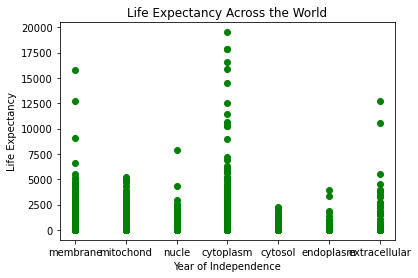

In [23]:
#plotting LifeExpectancy Vs other values using matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Customizing the pie long, medium and short chart and playing around with the functions
labels = 'Long Flight', 'Medium Flight', 'Short Flight'
sizes = [403, 246, 351]
 
colors = ( "orange", "cyan", "brown") 
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0) #Can change the value to make the slice of the pie farther or closer 
#in this case the long flights are extended 

#Customizing the pie chart explode makes a slice pop out startangle rotates it
ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Distribution of Long, Medium and Short Flights Distances Accross the flights.1K.csv Dataset') 
plt.legend(patches, labels, loc="best") #legend is poorly placed but I mostly wanted to work with the code
#the legend can be moved with upper left, lower right, upper right, designitions but all of them look worse
plt.show()


In [7]:
#obtaining the names of all the tables with the engine connection
yeast_engine.table_names()

['Bioprocess',
 'Description',
 'Expression',
 'Genes',
 'Member',
 'Molecular',
 'Relation',
 'Treatment',
 'locations',
 'sqlite_sequence']

In [9]:
#obtaining table descriptions from database, similiar to .schema command function with SQLite3 in the terminal
from sqlalchemy import create_engine, inspect


inspector = inspect(yeast_engine)
table_names = inspector.get_table_names()
for table_name in table_names:
    print(f"Table:{table_name}")
    column_items = inspector.get_columns(table_name)
    print('\t'.join(n for n in column_items[0]))
    for c in column_items:
        assert len(c) == len(column_items[0])
        print('\t'.join(str(c[n]) for n in c))

Table:Bioprocess
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	False	None	auto	1
process	TEXT	True	None	auto	0
Table:Description
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	False	None	auto	1
meaning	TEXT	True	None	auto	0
Table:Expression
name	type	nullable	default	autoincrement	primary_key
gene_id	INTEGER	True	None	auto	0
transcripts	INTEGER	True	None	auto	0
treatment_id	INTEGER	True	None	auto	0
location_id	INTEGER	True	None	auto	0
meaning_id	INTEGER	True	None	auto	0
function_id	INTEGER	True	None	auto	0
bioprocess_id	INTEGER	True	None	auto	0
Table:Genes
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	False	None	auto	1
name	TEXT	True	None	auto	0
Table:Member
name	type	nullable	default	autoincrement	primary_key
gene_id	INTEGER	True	None	auto	1
location_id	INTEGER	True	None	auto	2
function_id	INTEGER	True	None	auto	3
bioprocess_id	INTEGER	True	None	auto	4
Table:Molecular
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	F

CompileError: Can't generate DDL for NullType(); did you forget to specify a type on this Column?

In [25]:

yeast_engine.execute("SELECT * FROM locations").fetchall()

[(1, 'membrane'),
 (2, 'mitochond'),
 (3, 'nucle'),
 (18, 'cytoplasm'),
 (22, 'cytosol'),
 (41, 'endoplasm'),
 (121, 'extracellular')]

In [13]:
#Joining the yeast member table with the Expression table by the gene_id common term 
session.query(Expression).join(Member).filter(Invoice.amount == 8500).all()

result = session.query(Customer).join(Invoice).filter(Invoice.amount == 8500)
for row in result:
   for inv in row.invoices:
      print (row.id, row.name, inv.invno, inv.amount)

#SELECT Expression.gene_id, Expression.location_id, Expression.function_id, Expression.bioprocess_id.n_id=Molecular.id, Expression.location_id=locations.id, Expression.bioprocess_id=Bioprocess.id''', conn)
#FROM Expression JOIN Member on Expression.gene_id = Member.gene_id

SyntaxError: unterminated triple-quoted string literal (detected at line 2) (3597464344.py, line 1)

In [14]:
#EdgeR package installation
#IMPORTANT: Running this might take some minutes!
if (requireNamespace("BiocManager", quietly = TRUE)):
    install.packages("BiocManager")
BiocManager:install("edgeR")

NameError: name 'requireNamespace' is not defined

In [15]:
#Connection to SQLite yeast database--------------------------
library(RSQLite)
sqlite <- dbDriver("SQLite")
conn <- dbConnect(sqlite, "../input/yeast-database/yeast.sqlite")
df<-dbSendQuery(conn,"SELECT Expression.transcripts, Genes.name, Description.meaning,Molecular.function,Treatment.condition,locations.location,Bioprocess.process
                  FROM Expression JOIN Genes JOIN Description JOIN Molecular JOIN Treatment JOIN locations JOIN Bioprocess
                ON Expression.gene_id=Genes.id AND Expression.meaning_id=Description.id AND Expression.treatment_id=Treatment.id
                AND Expression.function_id=Molecular.id AND Expression.location_id=locations.id AND Expression.bioprocess_id=Bioprocess.id")
df<-dbFetch(df)
#Reshape dataframe---------------------------------------------
library(reshape2)
heat<-dplyr::filter(df, grepl("temperature|control",meaning))
heat[4:6] <- list(NULL)
heat$meaning <- with(heat,factor(meaning, levels = c("30 deg temperature", "37 deg temperature","15 deg temperature","tet-control strain tet-control"), 
                               labels = c("T30", "T37","T15","Control")))
#Setting genes as indexes & filtering low gene counts----------
library(tidyverse)
heat$indx <-with(heat, ave(seq_along(name), meaning, name, FUN=seq_along))
heatm<-dcast(heat, name~meaning+indx, value.var="transcripts")
heatm<-heatm %>% column_to_rownames(., var = "name")
data_subset <- heatm[rowSums(heatm)>1,]  #Genes with a count lower than 1 million are eliminated
cat('Table with the expression of genes for each treatment')
head(data_subset)

SyntaxError: unterminated string literal (detected at line 5) (1612274482.py, line 5)